[View in Colaboratory](https://colab.research.google.com/github/targoons/ML/blob/master/Machine_Learning_Assignment_1.ipynb)

# MsCA 31009 - Machine Learning and Predictive Analytics

## Assignment 1 - Regression with Normal Equation

**Targoon Siripanichpong**

### Import files and libraries.

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

**Mount Google Drive.**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Read bottle.csv file.**

In [3]:
mypath = '/content/gdrive/My Drive/UChicago/Machine Learning/Data/Raw'
import os
os.listdir(mypath)

['bottle.csv']

In [4]:
bottle_data = pd.read_csv('/content/gdrive/My Drive/UChicago/Machine Learning/Data/Raw/bottle.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Exploration, Cleaning, and Preparation

In [6]:
type(bottle_data)

pandas.core.frame.DataFrame

In [7]:
bottle_data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


**Extract only 'T_degC', 'Salnty', and 'STheta' **

In [5]:
bottle_data_subset = bottle_data.loc[:,['T_degC','Salnty','STheta']]
bottle_data_subset.describe()

,T_degC,Salnty,STheta
count,853900.000000,817509.000000,812174.000000
mean,10.799677,33.840350,25.819394
std,4.243825,0.461843,1.167787
min,1.440000,28.431000,20.934000
25%,7.680000,33.488000,24.965000
50%,10.060000,33.863000,25.996000
75%,13.880000,34.196900,26.646000
max,31.140000,37.034000,250.784000


In [9]:
bottle_data_subset.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


**Remove NaN.**

In [10]:
bottle_data_subset = bottle_data_subset.dropna()
bottle_data_subset.describe()

,T_degC,Salnty,STheta
count,812174.000000,812174.000000,812174.000000
mean,10.847904,33.842424,25.819394
std,4.221005,0.461567,1.167787
min,1.440000,28.431000,20.934000
25%,7.750000,33.490000,24.965000
50%,10.100000,33.869200,25.996000
75%,13.910000,34.198000,26.646000
max,31.140000,37.034000,250.784000


**Scatter Plots**

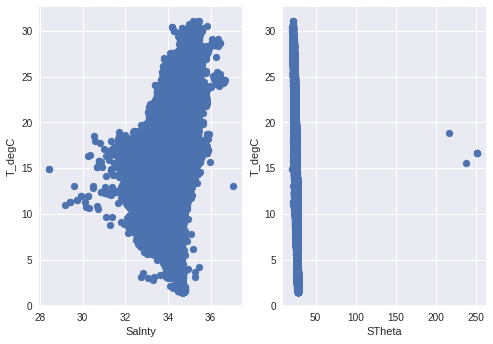

In [6]:
plt.subplot(1, 2, 1)
plt.scatter(bottle_data_subset['Salnty'], bottle_data_subset['T_degC'])
plt.xlabel('Salnty')
plt.ylabel('T_degC')
plt.subplot(1, 2, 2)
plt.scatter(bottle_data_subset['STheta'], bottle_data_subset['T_degC'])
plt.xlabel('STheta')
plt.ylabel('T_degC')
plt.show()

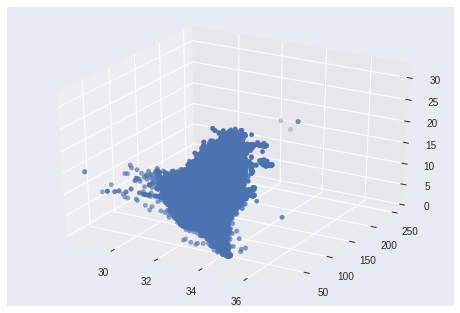

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(bottle_data_subset['Salnty'], bottle_data_subset['STheta'], bottle_data_subset['T_degC'])
plt.show()

**Split Train and Test data.**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(bottle_data_subset.iloc[:,1:], bottle_data_subset.iloc[:,0], test_size = .3, random_state = 43)

In [13]:
x_train.describe()

,Salnty,STheta
count,568521.000000,568521.000000
mean,33.842648,25.820253
std,0.461389,1.230113
min,28.431000,20.934000
25%,33.490000,24.966000
50%,33.870000,25.999000
75%,34.198000,26.646000
max,36.658000,250.784000


### Model Selection

#### OLS Linear Regression

**Find Theta through Normal equation.**

In [14]:
X_b_train = np.c_[np.ones((len(x_train), 1)), x_train]
X_b_test = np.c_[np.ones((len(x_test), 1)), x_test]
theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)
print(theta_best)
X_b_train

[101.29087277  -0.73351708  -2.54137422]


array([[ 1.   , 33.52 , 24.632],
       [ 1.   , 33.06 , 24.924],
       [ 1.   , 34.077, 26.633],
       ...,
       [ 1.   , 33.337, 25.465],
       [ 1.   , 33.3  , 25.295],
       [ 1.   , 34.38 , 24.414]])

In [0]:
y_predict_train = np.dot(X_b_train,theta_best)
y_predict_test = np.dot(X_b_test,theta_best)

In [16]:
rmse_train = math.sqrt(sum((y_predict_train - y_train)**2) / (len(y_predict_train)-1))
print(rmse_train)

r_sq_train = 1 - sum((y_predict_train - y_train)**2) / sum((y_train - np.mean(y_train))**2)
print(r_sq_train)

2.593596458929135
0.6225818622722781


In [17]:
rmse_test = math.sqrt(sum((y_predict_test - y_test)**2) / (len(y_predict_test)-1))
print(rmse_test)

r_sq_test = 1 - sum((y_predict_test - y_test)**2) / sum((y_test - np.mean(y_test))**2)
print(r_sq_test)

1.8514787259590224
0.8074450564063682


**Use Linear Regression in SKlearn.**

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(101.29087276574182, array([-0.73351708, -2.54137422]))

In [19]:
y_predict_train_skl = lin_reg.predict(x_train)
y_predict_test_skl = lin_reg.predict(x_test)

r_sq_train_skl = lin_reg.score(x_train, y_train)
print(r_sq_train_skl)
r_sq_test_skl = lin_reg.score(x_test, y_test)
print(r_sq_test_skl)

0.6225818622722982
0.8074450564057368
